<a href="https://colab.research.google.com/github/igvteam/spacewalk/blob/master/CSVtoSpacewalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# From CSV to Spacewalk
### This notebook shows how to convert from a simple csv data source to Spacewalk binary file format. Data is converted in two steps:
1.  From csv to a legacy text-based Spacewalk format
2.  From legacy text-based Spacewalk format to binary Spacewalk format

### Spacewalk can visualize two styles of data:
*   Pointcloud data - multiple xyz locations for each genomic extent
*   Ball & Stick - single xyz location for each genomic extent

##### Documentation for the Spacwalk binary file format can be found [here](https://github.com/igvteam/spacewalk/wiki).

##### While the legacy text-based format is nolonger supportecd by the Spacewalk app, it may be useful as a reference for those of you interested in writing your own data converters: [Link](https://github.com/igvteam/spacewalk/wiki/Legacy-Spacewalk-Text-Format). The file conversion tool [Link](https://github.com/turner/swt2sw) used in this notebook is an example of such a file converter.

### Install required tools

In [ ]:
pip install git+https://github.com/jrobinso/hdf5-indexer.git

In [ ]:
pip install git+https://github.com/turner/swt2sw.git

In [ ]:
from google.colab import files

### Convert pointcloud data in csv format to legacy Spacewalk text file format in a file named pointcloud.swt

In [ ]:
csv_pointcloud_content = """
format=sw1,name=STm,genome=NC_016856.1,,,
chromosome,start,end,x,y,z
trace,0,,,,
NC_016856.1,1,250000,35387.8,40858.4,-168.916
NC_016856.1,1,250000,35387.8,40858.4,-168.916
NC_016856.1,1,250000,35387.8,40858.4,-168.916
NC_016856.1,1,250000,35387.8,40858.4,-168.916
NC_016856.1,1,250000,35387.2,40957.6,-224.277
NC_016856.1,1,250000,35387.2,40957.6,-224.277
NC_016856.1,1,250000,35387.2,40957.6,-224.277
NC_016856.1,1,250000,35387.2,40957.6,-224.277
NC_016856.1,1,250000,35387.2,40957.6,-224.277
NC_016856.1,1,250000,35387.2,40957.6,-224.277
NC_016856.1,1,250000,35387.2,40957.6,-224.277
NC_016856.1,1,250000,35387.2,40957.6,-224.277
NC_016856.1,1,250000,34598.3,41413.1,-266.698
NC_016856.1,1,250000,35042.4,41476.8,-147.704
NC_016856.1,1,250000,34540.9,41249.1,-209.275
NC_016856.1,1,250000,35087.7,41274.2,-145.787
NC_016856.1,250001,500000,34997.5,41479,-127.784
NC_016856.1,250001,500000,34997.5,41479,-127.777
NC_016856.1,250001,500000,34983.8,41569.9,-165.485
NC_016856.1,250001,500000,34513.3,41262.7,-225.397
NC_016856.1,250001,500000,34884.2,41617.7,-120.442
NC_016856.1,250001,500000,34883.6,41712.3,-51.0298
NC_016856.1,250001,500000,35084.2,41629.1,-43.6898
NC_016856.1,250001,500000,34997.8,41390.9,-105.518
NC_016856.1,250001,500000,34953.2,41724.7,-34.081
NC_016856.1,250001,500000,35124.1,41681.8,-20.7831
NC_016856.1,250001,500000,35342.8,41159.4,-17.6975
NC_016856.1,250001,500000,34929,41711,-6.33353
NC_016856.1,250001,500000,35017.5,41559.1,-118.256
NC_016856.1,250001,500000,35272.9,41195.1,4.26766
NC_016856.1,250001,500000,35037.8,41482.5,-93.3554
NC_016856.1,250001,500000,34962.6,41425.8,-107.651
NC_016856.1,500001,750000,34751.1,41182.8,-149.127
NC_016856.1,500001,750000,34751.1,41182.8,-149.126
NC_016856.1,500001,750000,34751.1,41182.8,-149.126
NC_016856.1,500001,750000,34751.1,41182.8,-149.125
NC_016856.1,500001,750000,34751.1,41182.8,-149.124
NC_016856.1,500001,750000,34751.1,41182.8,-149.123
NC_016856.1,500001,750000,34751.1,41182.8,-149.122
NC_016856.1,500001,750000,34890.6,41208,-110.846
NC_016856.1,500001,750000,35116.2,41346.6,-86.9809
NC_016856.1,500001,750000,34538.4,41158.4,-72.9707
NC_016856.1,500001,750000,34912.3,41318.6,-164.089
NC_016856.1,500001,750000,34845.1,41215.9,-175.869
NC_016856.1,500001,750000,34982.2,41306.9,-62.1968
NC_016856.1,500001,750000,35107.5,41376.9,-61.6975
NC_016856.1,500001,750000,35073.3,41358.1,-65.0259
NC_016856.1,500001,750000,35028.9,41341.1,-59.7771
NC_016856.1,750001,1000000,34710.9,41376.3,-76.9865
NC_016856.1,750001,1000000,34710.9,41376.3,-76.9848
NC_016856.1,750001,1000000,34710.9,41376.3,-76.9831
NC_016856.1,750001,1000000,34710.9,41376.3,-76.9814
NC_016856.1,750001,1000000,34710.9,41376.3,-76.9797
NC_016856.1,750001,1000000,34752,41305,-148.201
NC_016856.1,750001,1000000,34874.7,41126.1,-101.839
NC_016856.1,750001,1000000,34540.4,41324.7,-200.745
NC_016856.1,750001,1000000,34865.5,41505.5,-71.177
NC_016856.1,750001,1000000,34865.5,41505.5,-71.1753
NC_016856.1,750001,1000000,34958.2,41355.1,-129.22
NC_016856.1,750001,1000000,35046.4,41471.5,-141.586
NC_016856.1,750001,1000000,34982.9,41411,-81.492
NC_016856.1,750001,1000000,34822.8,41225,-137.462
NC_016856.1,750001,1000000,34619.3,41305.9,-141.431
NC_016856.1,750001,1000000,35001,41360.3,-132.385
NC_016856.1,1000001,1250000,35240.8,41303.2,-155.73
NC_016856.1,1000001,1250000,35240.8,41303.2,-155.728
NC_016856.1,1000001,1250000,35240.8,41303.2,-155.727
NC_016856.1,1000001,1250000,35240.8,41303.2,-155.726
NC_016856.1,1000001,1250000,35240.8,41303.2,-155.724
NC_016856.1,1000001,1250000,35240.8,41303.2,-155.723
NC_016856.1,1000001,1250000,35133,41302.7,-125.575
NC_016856.1,1000001,1250000,34983.3,41352.7,-68.9003
NC_016856.1,1000001,1250000,35032.7,41388.7,-59.8846
NC_016856.1,1000001,1250000,35103.5,41472.1,-98.5808
NC_016856.1,1000001,1250000,35272.7,41517.8,-78.2855
NC_016856.1,1000001,1250000,35274.5,41554.3,-89.2373
NC_016856.1,1000001,1250000,35209.1,41582.6,-84.0035
NC_016856.1,1000001,1250000,35227.7,41584.9,-95.2997
NC_016856.1,1000001,1250000,35244.3,41510.3,-135.482
NC_016856.1,1000001,1250000,35038.6,41437.8,-102.121
NC_016856.1,1250001,1500000,34766.3,41339.9,-69.2071
NC_016856.1,1250001,1500000,34680,41575.8,-65.2223
NC_016856.1,1250001,1500000,34593.3,41247.4,-110.673
NC_016856.1,1250001,1500000,34693.4,41362.9,-74.8164
NC_016856.1,1250001,1500000,34769.1,41355.9,-67.762
NC_016856.1,1250001,1500000,34741.6,41487.3,-21.327
NC_016856.1,1250001,1500000,34548,41380.6,-14.5017
NC_016856.1,1250001,1500000,34851.2,41339.3,-51.4842
NC_016856.1,1250001,1500000,34722.3,41302.8,-74.9557
NC_016856.1,1250001,1500000,34722.3,41302.8,-74.9541
NC_016856.1,1250001,1500000,34722.3,41302.8,-74.9525
NC_016856.1,1250001,1500000,34722.3,41302.8,-74.9509
NC_016856.1,1250001,1500000,34722.3,41302.8,-74.9493
NC_016856.1,1250001,1500000,34722.3,41302.8,-74.9477
NC_016856.1,1250001,1500000,34722.3,41302.8,-74.9461
NC_016856.1,1250001,1500000,34722.3,41302.8,-74.9444
NC_016856.1,1500001,1750000,34794.2,41142.1,4.11918
NC_016856.1,1500001,1750000,34565.2,41188,-69.4912
NC_016856.1,1500001,1750000,35269.1,40966.8,-143.098
NC_016856.1,1500001,1750000,34633,41080.6,-13.3283
NC_016856.1,1500001,1750000,35256.2,40862.1,-58.1316
NC_016856.1,1500001,1750000,34971.2,41347.9,-79.0208
NC_016856.1,1500001,1750000,35486.9,41154.2,-44.2903
NC_016856.1,1500001,1750000,35316.6,41197.3,-76.7513
NC_016856.1,1500001,1750000,34716.2,41192.9,-174.607
NC_016856.1,1500001,1750000,34749.8,41020.5,-176.452
NC_016856.1,1500001,1750000,34979,41135.3,-103.389
NC_016856.1,1500001,1750000,34627.3,41058.6,-17.8536
NC_016856.1,1500001,1750000,34621.1,41004.8,-21.5846
NC_016856.1,1500001,1750000,35344.6,41078.4,-145.347
NC_016856.1,1500001,1750000,34752.5,41064.4,-73.2543
NC_016856.1,1500001,1750000,35032.5,41111,-173.387
NC_016856.1,1750001,2000000,34740.1,41058.9,23.9621
NC_016856.1,1750001,2000000,34925.3,40778.2,-66.7962
NC_016856.1,1750001,2000000,34815,40496.2,-51.6563
NC_016856.1,1750001,2000000,35283.1,40952.5,-67.9245
NC_016856.1,1750001,2000000,35040.7,40533.5,-70.8731
NC_016856.1,1750001,2000000,34848.3,40765.5,-118.72
NC_016856.1,1750001,2000000,35242.2,40684.6,-76.8801
NC_016856.1,1750001,2000000,35189.3,40692.5,-123.71
NC_016856.1,1750001,2000000,35031.5,40880.1,-149.563
NC_016856.1,1750001,2000000,35038.1,40530.6,-64.8933
NC_016856.1,1750001,2000000,35030.8,40704.8,-82.1857
NC_016856.1,1750001,2000000,35022.5,40552.1,-40.5748
NC_016856.1,1750001,2000000,35162.5,40639.9,-6.52506
NC_016856.1,1750001,2000000,35124.2,40863.6,-91.6194
NC_016856.1,1750001,2000000,34873.6,40928.4,-53.1088
NC_016856.1,1750001,2000000,34873.6,40928.4,-53.1028
NC_016856.1,2000001,2250000,34920.3,41107.4,-18.7592
NC_016856.1,2000001,2250000,34671.4,41248.2,-130.38
NC_016856.1,2000001,2250000,34924.3,41190.8,-9.71336
NC_016856.1,2000001,2250000,34995.7,41181.4,9.1116
NC_016856.1,2000001,2250000,34944.6,41166.3,0.0592132
NC_016856.1,2000001,2250000,34844.5,41159.2,-40.6514
NC_016856.1,2000001,2250000,34883.4,41125.8,-20.6224
NC_016856.1,2000001,2250000,34808.5,41140.2,-36.6707
NC_016856.1,2000001,2250000,34720.5,41055.7,-64.9845
NC_016856.1,2000001,2250000,34872.5,41060.9,-28.0741
NC_016856.1,2000001,2250000,34712.5,41174.7,-63.8162
NC_016856.1,2000001,2250000,34893.5,40998.2,-16.6048
NC_016856.1,2000001,2250000,34767.7,40959,-91.2409
NC_016856.1,2000001,2250000,34803.4,41234.5,-80.824
NC_016856.1,2000001,2250000,34867.5,41154.3,-35.9409
NC_016856.1,2000001,2250000,34780.4,41058.2,-25.7384
NC_016856.1,2250001,2500000,35203,40920.2,-126.432
NC_016856.1,2250001,2500000,35489.6,40953.8,-146.352
NC_016856.1,2250001,2500000,35358.7,40701.8,-89.9952
NC_016856.1,2250001,2500000,35001.9,40882.5,-78.3135
NC_016856.1,2250001,2500000,35001.1,41018.6,-140.71
NC_016856.1,2250001,2500000,34815.7,41028.9,-95.7558
NC_016856.1,2250001,2500000,35062.3,41192.6,-27.0506
NC_016856.1,2250001,2500000,35079.3,41161.7,-21.8505
NC_016856.1,2250001,2500000,35395.9,40957.4,-164.02
NC_016856.1,2250001,2500000,35395.9,40957.4,-164.016
NC_016856.1,2250001,2500000,35395.9,40957.4,-164.012
NC_016856.1,2250001,2500000,35395.9,40957.4,-164.009
NC_016856.1,2250001,2500000,35395.9,40957.4,-164.005
NC_016856.1,2250001,2500000,35395.8,40957.4,-164.001
NC_016856.1,2250001,2500000,35395.8,40957.4,-163.998
NC_016856.1,2250001,2500000,35395.8,40957.4,-163.994
NC_016856.1,2500001,2750000,35053.2,41204.6,-25.2888
NC_016856.1,2500001,2750000,34908.1,41369.4,-33.0194
NC_016856.1,2500001,2750000,35111.4,41070.4,-128.091
NC_016856.1,2500001,2750000,35062.4,41254.1,-36.483
NC_016856.1,2500001,2750000,35105.3,41215.7,-19.8987
NC_016856.1,2500001,2750000,35184,41273.2,-33.6492
NC_016856.1,2500001,2750000,35184,41273.2,-33.6457
NC_016856.1,2500001,2750000,35184,41273.2,-33.642
NC_016856.1,2500001,2750000,35184,41273.2,-33.6383
NC_016856.1,2500001,2750000,35184,41273.2,-33.6348
NC_016856.1,2500001,2750000,35184,41273.2,-33.6311
NC_016856.1,2500001,2750000,34987.1,41290.3,-30.4214
NC_016856.1,2500001,2750000,35077.4,41237.6,-33.3274
NC_016856.1,2500001,2750000,35150.7,41282.8,-50.6023
NC_016856.1,2500001,2750000,34975.3,41113.6,-70.2063
NC_016856.1,2500001,2750000,34892.5,41061.2,-115.192
NC_016856.1,2750001,3000000,35321.5,41141.6,-91.1824
NC_016856.1,2750001,3000000,35417.7,40856.5,-147.109
NC_016856.1,2750001,3000000,35593.5,40928.4,-113.199
NC_016856.1,2750001,3000000,35558.5,40972.6,-106.608
NC_016856.1,2750001,3000000,34905.2,41388.3,6.91783
NC_016856.1,2750001,3000000,34898.8,41324.8,18.479
NC_016856.1,2750001,3000000,35048.2,40945.3,-128.963
NC_016856.1,2750001,3000000,35146.8,40908,-99.911
NC_016856.1,2750001,3000000,35085.7,40987.3,-132.574
NC_016856.1,2750001,3000000,35140.6,40905.4,-81.7744
NC_016856.1,2750001,3000000,35257.4,41033.5,-95.8193
NC_016856.1,2750001,3000000,35208.7,41025.1,-88.2417
NC_016856.1,2750001,3000000,35260.1,40951.4,-75.9219
NC_016856.1,2750001,3000000,35154.4,41054.5,-87.1972
NC_016856.1,2750001,3000000,35151.2,40974.4,-103.954
NC_016856.1,2750001,3000000,35424.8,40778,-108.852
NC_016856.1,3000001,3250000,35333.5,41007.4,-59.6699
NC_016856.1,3000001,3250000,35174,41141.3,-94.2408
NC_016856.1,3000001,3250000,35198.6,41093.8,-57.7246
NC_016856.1,3000001,3250000,34977.4,41294.4,-75.5671
NC_016856.1,3000001,3250000,35027.6,41272.1,1.20438
NC_016856.1,3000001,3250000,34997.8,41170.7,-37.5803
NC_016856.1,3000001,3250000,35108.4,41211.5,-64.5559
NC_016856.1,3000001,3250000,35069.5,41316.6,-69.1324
NC_016856.1,3000001,3250000,35028.6,41312.1,-48.2614
NC_016856.1,3000001,3250000,35352.6,41115.9,-84.699
NC_016856.1,3000001,3250000,35022.2,41137.6,-2.18478
NC_016856.1,3000001,3250000,35022.2,41137.6,-2.18603
NC_016856.1,3000001,3250000,35022.3,41137.6,-2.18729
NC_016856.1,3000001,3250000,35022.3,41137.6,-2.18854
NC_016856.1,3000001,3250000,35022.3,41137.6,-2.18997
NC_016856.1,3000001,3250000,35022.3,41137.6,-2.19122
NC_016856.1,3250001,3500000,35312.9,40863.5,-80.5919
NC_016856.1,3250001,3500000,35176.8,40825.5,-52.6331
NC_016856.1,3250001,3500000,35202.1,40701.3,-65.3645
NC_016856.1,3250001,3500000,35369,40973.2,-75.3577
NC_016856.1,3250001,3500000,35174.2,40795,-90.5182
NC_016856.1,3250001,3500000,35202.3,40717.7,-87.2521
NC_016856.1,3250001,3500000,35338.6,40764.3,-73.8421
NC_016856.1,3250001,3500000,35329.1,40862.9,-75.2424
NC_016856.1,3250001,3500000,35132,40843.9,-73.6445
NC_016856.1,3250001,3500000,35000.1,40740.3,9.63048
NC_016856.1,3250001,3500000,34994.4,40754.1,12.9131
NC_016856.1,3250001,3500000,35386.5,40757.5,-71.4673
NC_016856.1,3250001,3500000,35325.2,40678.9,-90.5036
NC_016856.1,3250001,3500000,35318.7,40775,-106.118
NC_016856.1,3250001,3500000,35376.2,40687.5,-76.9284
NC_016856.1,3250001,3500000,34837.6,40708.9,-57.6237
NC_016856.1,3500001,3750000,35359.8,41179.5,-64.226
NC_016856.1,3500001,3750000,35359.8,41179.5,-64.2274
NC_016856.1,3500001,3750000,35359.8,41179.5,-64.2291
NC_016856.1,3500001,3750000,35359.8,41179.5,-64.2305
NC_016856.1,3500001,3750000,35359.8,41179.5,-64.232
NC_016856.1,3500001,3750000,35359.8,41179.5,-64.2334
NC_016856.1,3500001,3750000,35359.8,41179.5,-64.2351
NC_016856.1,3500001,3750000,35359.8,41179.5,-64.2365
NC_016856.1,3500001,3750000,35359.8,41179.5,-64.238
NC_016856.1,3500001,3750000,35334.1,41134,-88.6818
NC_016856.1,3500001,3750000,35347.1,41131.6,-87.917
NC_016856.1,3500001,3750000,35316.6,41102,-48.9011
NC_016856.1,3500001,3750000,35340.9,41158.7,-66.0035
NC_016856.1,3500001,3750000,35112.5,41115.3,-114.386
NC_016856.1,3500001,3750000,35201.8,41089.3,-136.119
NC_016856.1,3500001,3750000,35211,41099.6,-91.6497
NC_016856.1,3750001,4000000,35392.3,41244.6,-82.1272
NC_016856.1,3750001,4000000,35392.3,41244.7,-82.1244
NC_016856.1,3750001,4000000,35392.3,41244.7,-82.1215
NC_016856.1,3750001,4000000,35392.3,41244.7,-82.1186
NC_016856.1,3750001,4000000,35392.3,41244.7,-82.1153
NC_016856.1,3750001,4000000,35392.3,41244.7,-82.1125
NC_016856.1,3750001,4000000,35392.3,41244.7,-82.1096
NC_016856.1,3750001,4000000,35392.3,41244.7,-82.1067
NC_016856.1,3750001,4000000,35392.3,41244.7,-82.1034
NC_016856.1,3750001,4000000,35295.7,41316.5,-90.9313
NC_016856.1,3750001,4000000,35341.6,41295.2,-51.6119
NC_016856.1,3750001,4000000,35445.2,41220.7,-57.6073
NC_016856.1,3750001,4000000,35497,41322.4,-163.017
NC_016856.1,3750001,4000000,35383.6,41193,-122.071
NC_016856.1,3750001,4000000,35367.1,41285.3,-50.6585
NC_016856.1,3750001,4000000,34930.1,41250.3,-14.2476
NC_016856.1,4000001,4250000,35501.2,41504.9,-117.98
NC_016856.1,4000001,4250000,35501.2,41504.9,-117.977
NC_016856.1,4000001,4250000,35501.2,41504.9,-117.974
NC_016856.1,4000001,4250000,35501.2,41504.9,-117.971
NC_016856.1,4000001,4250000,35501.2,41504.9,-117.968
NC_016856.1,4000001,4250000,35501.1,41504.9,-117.965
NC_016856.1,4000001,4250000,35501.1,41504.9,-117.962
NC_016856.1,4000001,4250000,35501.1,41504.9,-117.959
NC_016856.1,4000001,4250000,35501.1,41504.8,-117.957
NC_016856.1,4000001,4250000,35501.1,41504.8,-117.953
NC_016856.1,4000001,4250000,35501.1,41504.8,-117.951
NC_016856.1,4000001,4250000,35566.5,41340.1,-108.651
NC_016856.1,4000001,4250000,35629.4,41473.3,-38.1984
NC_016856.1,4000001,4250000,35542.6,41388.3,-120.676
NC_016856.1,4000001,4250000,35460.4,41170.8,-145.602
NC_016856.1,4000001,4250000,35521.4,41465.7,-136.66
NC_016856.1,4250001,4500000,34875.5,41157.6,-62.5804
NC_016856.1,4250001,4500000,35307,41019.4,-73.9341
NC_016856.1,4250001,4500000,35345,41161.8,-59.9302
NC_016856.1,4250001,4500000,35553.5,40917.6,-23.2457
NC_016856.1,4250001,4500000,35066.5,41160.4,-11.6526
NC_016856.1,4250001,4500000,34923,41160.3,4.36264
NC_016856.1,4250001,4500000,34839.6,41258.5,-102.293
NC_016856.1,4250001,4500000,34818.6,40874.3,-23.2346
NC_016856.1,4250001,4500000,34932.2,41291.5,-12.0645
NC_016856.1,4250001,4500000,34986.1,40796.5,-43.6122
NC_016856.1,4250001,4500000,34999.7,40886.8,-42.4027
NC_016856.1,4250001,4500000,34908,41073.7,-62.1688
NC_016856.1,4250001,4500000,34908,41073.7,-62.1702
NC_016856.1,4250001,4500000,34908,41073.7,-62.1718
NC_016856.1,4250001,4500000,34908,41073.7,-62.1732
NC_016856.1,4250001,4500000,34908,41073.7,-62.1746
NC_016856.1,4500001,4750000,35305,41189.8,-165.849
NC_016856.1,4500001,4750000,34911.7,41197.8,-106.552
NC_016856.1,4500001,4750000,34911.7,41197.8,-106.548
NC_016856.1,4500001,4750000,34880.3,41181.3,-68.8707
NC_016856.1,4500001,4750000,34880.3,41181.3,-68.8672
NC_016856.1,4500001,4750000,34880.3,41181.3,-68.8636
NC_016856.1,4500001,4750000,34880.3,41181.3,-68.8596
NC_016856.1,4500001,4750000,34880.3,41181.3,-68.856
NC_016856.1,4500001,4750000,34880.3,41181.3,-68.8525
NC_016856.1,4500001,4750000,34880.3,41181.3,-68.8489
NC_016856.1,4500001,4750000,34880.3,41181.3,-68.8449
NC_016856.1,4500001,4750000,34880.3,41181.3,-68.8413
NC_016856.1,4500001,4750000,35413.1,41078.3,-88.1927
NC_016856.1,4500001,4750000,34924.1,41099.9,-39.0204
NC_016856.1,4500001,4750000,35442.6,41104,-117.765
NC_016856.1,4500001,4750000,35430.4,41040.3,-103.815
NC_016856.1,4750001,5000000,35292.4,41312.1,-140.982
NC_016856.1,4750001,5000000,35144.4,41186.6,-42.0708
NC_016856.1,4750001,5000000,35236.6,41238.8,-18.3653
NC_016856.1,4750001,5000000,35482.9,41100.3,-53.3645
NC_016856.1,4750001,5000000,35221.2,41339.5,-131.339
NC_016856.1,4750001,5000000,35258.7,41410.4,-95.0273
NC_016856.1,4750001,5000000,34651.8,41541.4,8.6323
NC_016856.1,4750001,5000000,34637.8,41518,23.7454
NC_016856.1,4750001,5000000,34661.2,41523.1,28.7679
NC_016856.1,4750001,5000000,35419.5,41298.1,-49.6596
NC_016856.1,4750001,5000000,35606.7,41169.3,-5.96179
NC_016856.1,4750001,5000000,35446.4,41495.3,-151.614
NC_016856.1,4750001,5000000,35075.1,41183.9,-77.2294
NC_016856.1,4750001,5000000,35393.8,41411,-95.9547
NC_016856.1,4750001,5000000,35158.7,41220.1,-72.9979
NC_016856.1,4750001,5000000,35400.4,41329.4,-91.3415
"""

# Convert CSV content to legacy text-based Spacewalk format
lines = csv_pointcloud_content.strip().split("\n")
output_lines = []

output_lines.append("##" + lines[0].replace(",", " ").replace("  ", " "))
output_lines.append(lines[1].replace(",", "\t"))

for line in lines[2:]:
    output_lines.append(line.replace(",", " ").strip())

formatted_content = "\n".join(output_lines)

# Save the formatted content to file
with open("pointcloud.swt", "w") as file:
    file.write(formatted_content)


In [ ]:
!ls

### Convert ball & stick data in csv format to legacy Spacewalk text file format in a file named ball-and-stick.swt

In [ ]:
csv_ball_stick_content = """
format=sw1,name=IMR90,genome=hg38,,,
chromosome,start,end,x,y,z
trace,0,,,
chr21,18000000,18030000,117803,58446,1733
chr21,18030000,18060000,117726,58747,1680
chr21,18060000,18090000,117747,58607,1872
chr21,18090000,18120000,117724,58415,1950
chr21,18120000,18150000,117235,58050,1521
chr21,18150000,18180000,117928,58829,1934
chr21,18180000,18210000,117852,58864,1850
chr21,18210000,18240000,117843,58639,2069
chr21,18240000,18270000,117550,58603,1707
chr21,18270000,18300000,117414,58435,1671
chr21,18300000,18330000,117322,59019,1455
chr21,18330000,18360000,117914,58540,1863
chr21,18360000,18390000,117460,58677,1536
chr21,18390000,18420000,118005,59004,1815
chr21,18420000,18450000,117879,58979,1817
chr21,18450000,18480000,117476,58942,1713
chr21,18480000,18510000,117758,58371,1629
chr21,18510000,18540000,117417,58624,1403
chr21,18540000,18570000,117321,58813,1577
chr21,18570000,18600000,117409,58742,1564
chr21,18600000,18630000,117946,58917,1858
chr21,18630000,18660000,117004,59196,1534
chr21,18660000,18690000,117580,58746,1777
chr21,18690000,18720000,117465,58724,1736
chr21,18720000,18750000,117529,58652,1640
chr21,18750000,18780000,117771,58517,2199
chr21,18780000,18810000,117784,58700,1703
chr21,18810000,18840000,117757,58774,1872
chr21,18840000,18870000,117708,58961,1576
chr21,18870000,18900000,117568,58765,1874
chr21,18900000,18930000,117686,58685,1921
chr21,18930000,18960000,117917,58487,1974
chr21,18960000,18990000,117920,58506,1802
chr21,18990000,19020000,117807,58670,1592
chr21,19020000,19050000,117579,58871,1585
chr21,19050000,19080000,117924,58963,1590
chr21,19080000,19110000,117495,58251,1704
chr21,19110000,19140000,117467,58847,1532
chr21,19140000,19170000,117842,59180,1572
chr21,19170000,19200000,118097,58884,2078
chr21,19200000,19230000,117417,58855,1538
chr21,19230000,19260000,117557,58966,1471
chr21,19260000,19290000,117475,58995,1525
chr21,19290000,19320000,117984,58771,2077
chr21,19320000,19350000,117819,58734,1916
chr21,19350000,19380000,117969,58695,1961
chr21,19380000,19410000,117884,58748,2046
chr21,19410000,19440000,117867,58813,1988
chr21,19440000,19470000,117849,58666,2128
chr21,19470000,19500000,117799,58502,1979
chr21,19500000,19530000,117723,58245,1983
chr21,19530000,19560000,117881,58609,1862
chr21,19560000,19590000,117784,58685,1802
chr21,19590000,19620000,117604,58738,1851
chr21,19620000,19650000,117546,58797,1729
chr21,19650000,19680000,117733,58474,2033
chr21,19680000,19710000,117649,58733,1906
chr21,19710000,19740000,117683,58742,1900
chr21,19740000,19770000,117613,58781,1850
chr21,19770000,19800000,117616,58472,1906
chr21,19800000,19830000,117523,58311,1741
chr21,19830000,19860000,117545,58617,1873
chr21,19860000,19890000,117824,58744,2038
chr21,19890000,19920000,117498,58463,1893
chr21,19920000,19950000,117514,59134,1399
"""

# Convert CSV content to legacy text-based Spacewalk format
lines = csv_ball_stick_content.strip().split("\n")
output_lines = []

output_lines.append("##" + lines[0].replace(",", " ").replace("  ", " "))
output_lines.append(lines[1].replace(",", "\t"))

for line in lines[2:]:
    output_lines.append(line.replace(",", " ").strip())

formatted_content = "\n".join(output_lines)

# Save the formatted content to file
with open("ball-and-stick.swt", "w") as file:
    file.write(formatted_content)


In [ ]:
!ls

### Convert the legacy text files to Spacewalk binary file format file.
##### The tool used is call sw2swb. Code and file format documentation is on Github [here](https://github.com/turner/sw2swb)

##### Convert ball & stick data to Spacewalk format:

In [ ]:
!swt2sw -f ball-and-stick.swt -n ball-and-stick -single-point

In [ ]:
!ls

##### Convert pointcloud data to Spacewalk format:

In [ ]:
!swt2sw -f pointcloud.swt -n pointcloud -multi-point

In [ ]:
!ls

##### Download the Spacewalk binary files (ball-and-stick.sw and pointcloud.sw) to your computer

In [ ]:
files.download('ball-and-stick.sw')

In [ ]:
files.download('pointcloud.sw')

### Install Spacewalk for viewing the Spacewalk binary file. Click the "File" menu item in the navbar to load either ball-and-stick.sw or pointcloud.sw

#### NOTE: for the pointcloud data in this example is rather sparse so you will need to increase the point size for better visualizing:
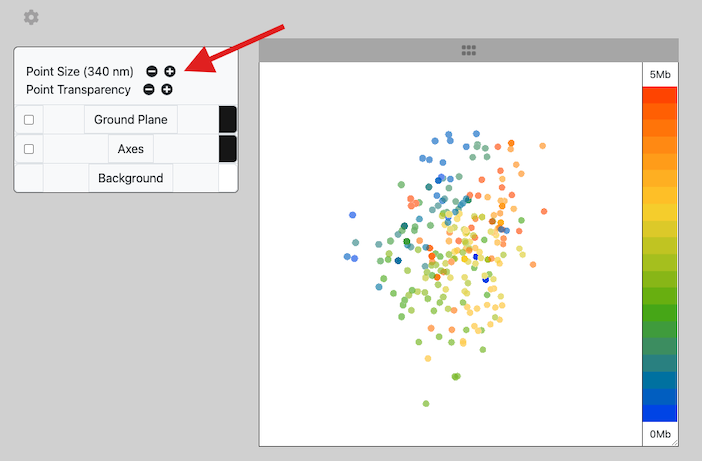

In [ ]:
from IPython.display import IFrame
from IPython.core.display import display
display(IFrame("https://aidenlab.org/spacewalk/", "100%", "960px"))